# Tutorial 7: Exploratory Data Analysis (EDA)

## Objectives

After this tutorial you will be able to:

*   Understand the importance of EDA
*   Apply EDA techniques to different data types
*   Assess relationships between variables
*   Coummunicate findings effectively
*   Apply EDA to real-word datasets

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#import-1">Import dataset 1</a>
    </li>
    <br>
</ol>


<hr id="import">

<h2>1. Import the dataset</h2>

Import the `Pandas` library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Read the data from `csv` into a `Pandas DataFrame`

In [2]:
df = pd.read_csv('IHMStefanini_industrial_safety_and_health_database.csv')
df.head()

,Data,Countries,Local,Industry Sector,Years of Experience,Age,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,1/1/2016 0:00,Country_01,Local_01,Mining,9.0,47,I,IV,Male,Third Party,Pressed
1,1/2/2016 0:00,Country_02,Local_02,Mining,4.7,60,I,IV,Male,Employee,Pressurized Systems
2,1/6/2016 0:00,Country_01,Local_03,Mining,8.6,30,I,III,Male,Third Party (Remote),Manual Tools
3,1/8/2016 0:00,Country_01,Local_04,Mining,8.7,40,I,I,Male,Third Party,Others
4,1/10/2016 0:00,Country_01,Local_04,Mining,3.7,34,IV,IV,Male,Third Party,Others


In [3]:
df.tail()

,Data,Countries,Local,Industry Sector,Years of Experience,Age,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
434,7/4/2017 0:00,Country_01,Local_04,Mining,5.1,47,I,III,Male,Third Party,Others
435,7/4/2017 0:00,Country_01,Local_03,Mining,3.1,23,I,II,Female,Employee,Others
436,7/5/2017 0:00,Country_02,Local_09,Metals,7.7,60,I,II,Male,Employee,Venomous Animals
437,7/6/2017 0:00,Country_02,Local_05,Metals,1.7,33,I,II,Male,Employee,Cut
438,7/9/2017 0:00,Country_01,Local_04,Mining,8.1,45,I,II,Female,Third Party,Fall prevention (same level)


Get information about the columns of the `DataFrame`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Data                      439 non-null    object 
 1   Countries                 439 non-null    object 
 2   Local                     439 non-null    object 
 3   Industry Sector           439 non-null    object 
 4   Years of Experience       439 non-null    float64
 5   Age                       439 non-null    int64  
 6   Accident Level            439 non-null    object 
 7   Potential Accident Level  439 non-null    object 
 8   Genre                     439 non-null    object 
 9   Employee ou Terceiro      439 non-null    object 
 10  Risco Critico             439 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 37.9+ KB


Standardize data

In [5]:
# convert column to datetime
df['Data'] = pd.to_datetime(df['Data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      439 non-null    datetime64[ns]
 1   Countries                 439 non-null    object        
 2   Local                     439 non-null    object        
 3   Industry Sector           439 non-null    object        
 4   Years of Experience       439 non-null    float64       
 5   Age                       439 non-null    int64         
 6   Accident Level            439 non-null    object        
 7   Potential Accident Level  439 non-null    object        
 8   Genre                     439 non-null    object        
 9   Employee ou Terceiro      439 non-null    object        
 10  Risco Critico             439 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 37.9+ KB


In [6]:
# create a new column for unique months
df['Month'] = df['Data'].dt.year.astype(str) + '-' + df['Data'].dt.month.astype(str).str.zfill(2)
df.head()

,Data,Countries,Local,Industry Sector,Years of Experience,Age,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico,Month
0,2016-01-01,Country_01,Local_01,Mining,9.0,47,I,IV,Male,Third Party,Pressed,2016-01
1,2016-01-02,Country_02,Local_02,Mining,4.7,60,I,IV,Male,Employee,Pressurized Systems,2016-01
2,2016-01-06,Country_01,Local_03,Mining,8.6,30,I,III,Male,Third Party (Remote),Manual Tools,2016-01
3,2016-01-08,Country_01,Local_04,Mining,8.7,40,I,I,Male,Third Party,Others,2016-01
4,2016-01-10,Country_01,Local_04,Mining,3.7,34,IV,IV,Male,Third Party,Others,2016-01


In [7]:
# create a new numberic column for the accident level (convert I, II, III, IV, V to 1, 2, 3, 4, 5)
df['Accident Level Num'] = df['Accident Level'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5})
df.head()

,Data,Countries,Local,Industry Sector,Years of Experience,Age,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico,Month,Accident Level Num
0,2016-01-01,Country_01,Local_01,Mining,9.0,47,I,IV,Male,Third Party,Pressed,2016-01,1
1,2016-01-02,Country_02,Local_02,Mining,4.7,60,I,IV,Male,Employee,Pressurized Systems,2016-01,1
2,2016-01-06,Country_01,Local_03,Mining,8.6,30,I,III,Male,Third Party (Remote),Manual Tools,2016-01,1
3,2016-01-08,Country_01,Local_04,Mining,8.7,40,I,I,Male,Third Party,Others,2016-01,1
4,2016-01-10,Country_01,Local_04,Mining,3.7,34,IV,IV,Male,Third Party,Others,2016-01,4


<hr id="desc">

<h2>2. Descriptive Analysis</h2>

Summarizing numerical data: measures of central tendency (mean, median, mode) and dispersion (range, variance, standard deviation)

In [8]:
print('Mean age:', df['Age'].mean())
print('Median age:', df['Age'].median())
print('Mode age:', df['Age'].mode())
print('Range of age:', df['Age'].max() - df['Age'].min())
print('Variance of age:', df['Age'].var())
print('Standard deviation of age:', df['Age'].std())

Mean age: 39.32118451025057
Median age: 38.0
Mode age: 0    30
Name: Age, dtype: int64
Range of age: 40
Variance of age: 143.236787634828
Standard deviation of age: 11.968157236384723


There is an easier way to describe the different parameters using `Pandas` method `DataFrame.describe()`

In [9]:
df.describe()

,Data,Years of Experience,Age,Accident Level Num
count,439,439.000000,439.000000,439.000000
mean,2016-09-14 14:03:00.410022656,4.579271,39.321185,1.526196
min,2016-01-01 00:00:00,0.000000,20.000000,1.000000
25%,2016-04-22 00:00:00,2.200000,29.000000,1.000000
50%,2016-09-03 00:00:00,4.500000,38.000000,1.000000
75%,2017-02-04 12:00:00,6.800000,50.000000,2.000000
max,2017-07-09 00:00:00,9.900000,60.000000,5.000000
std,NaN,2.773670,11.968157,1.030858


Summarizing categorical data: frequency tables and mode.  
We can use the `describe()` method for string parameters as follows:

In [18]:
df.describe(include='object')

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico,Month
count,439,439,439,439,439,439,439,439,439
unique,3,12,3,5,6,2,3,34,19
top,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,2016-02
freq,263,90,241,328,155,417,189,232,43


We can also create frequency tables for each parameter using the `value_counts()` method

In [19]:
df['Accident Level'].value_counts()

Accident Level
I      328
II      40
IV      31
III     31
V        9
Name: count, dtype: int64

<hr id="corr">

<h2>3. Correlation Statistics</h2>

We can calculate the Pearson correlation in `Pandas` using the `DataFrame.corr()` method between numerical values

In [26]:
df[['Years of Experience', 'Accident Level Num']].corr()

,Years of Experience,Accident Level Num
Years of Experience,1.000000,-0.351187
Accident Level Num,-0.351187,1.000000


We can also calculate a correlation matrix between ALL numerical variables in a dataframe as follows:

In [27]:
# calculate the correlation matrix
df.corr(numeric_only=True)

,Years of Experience,Age,Accident Level Num
Years of Experience,1.000000,0.068304,-0.351187
Age,0.068304,1.000000,-0.070912
Accident Level Num,-0.351187,-0.070912,1.000000


An appropriate way to visualize a correlation matrix is through a heatmap

<Axes: >

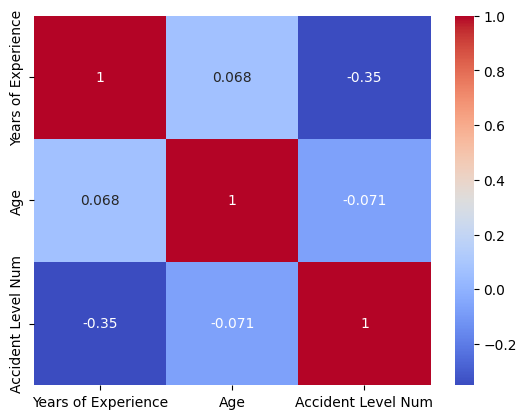

In [30]:
# plot the correlation matrix
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

We can also calculate the Pearson correlation using the `scipy.stats` module

In [32]:
# calculate correlation between two columns
stats.pearsonr(df['Years of Experience'], df['Accident Level Num'])

PearsonRResult(statistic=-0.3511873980771613, pvalue=3.455894320207252e-14)

<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<Axes: xlabel='Years of Experience', ylabel='Accident Level Num'>

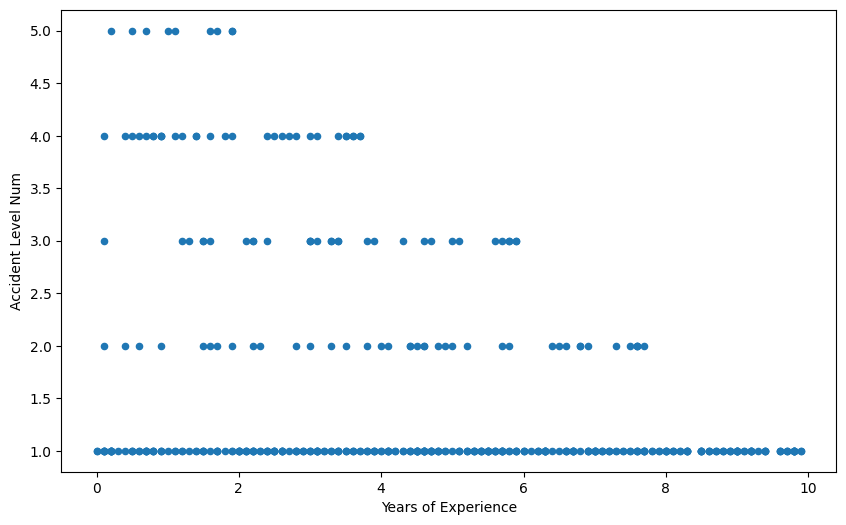

In [44]:
# plot the scatter plot between Years of Experience and Accident Level Num
df.plot(kind='scatter', x='Years of Experience', y='Accident Level Num', figsize=(10, 6))

We can explore the association between categorical variables using the Chi-Square test

In [38]:
# create the pivot/crosstab table
pivot = pd.crosstab(df['Genre'], df['Accident Level'])
pivot

Accident Level,I,II,III,IV,V
Genre,,,,,
Female,18,3,1,0,0
Male,310,37,30,31,9


In [42]:
# perform the chi-square test
stats.chi2_contingency(pivot)

Chi2ContingencyResult(statistic=2.9947433348650456, pvalue=0.5587054757860077, dof=4, expected_freq=array([[ 16.43735763,   2.00455581,   1.55353075,   1.55353075,
          0.45102506],
       [311.56264237,  37.99544419,  29.44646925,  29.44646925,
          8.54897494]]))

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our dependent variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


In [54]:
# calculate ANOVA for Industry Sector and Accident Level Num
df_anova = df[['Industry Sector', 'Accident Level Num']].groupby(['Industry Sector'])
df_anova.head()

,Industry Sector,Accident Level Num
0,Mining,1
1,Mining,1
2,Mining,1
3,Mining,1
4,Mining,4
5,Metals,1
6,Metals,1
9,Metals,1
12,Metals,1
14,Metals,1


In [56]:

anova_results = stats.f_oneway(
    df_anova.get_group('Mining')['Accident Level Num'], 
    df_anova.get_group('Metals')['Accident Level Num'], 
    df_anova.get_group('Others')['Accident Level Num']
)
anova_results

F_onewayResult(statistic=4.092333733312424, pvalue=0.017345940582392572)

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>
<a href="https://www.w3schools.com/python/default.asp">w3schools.com</a>
<br>
<a href="https://www.kaggle.com/datasets/ihmstefanini/industrial-safety-and-health-analytics-database">kaggle.com</a>